In [10]:
# Importing necessary modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
# Set up data
df = pd.read_csv("dataset.csv")

# Rename for clearer column names
df = df.rename(columns={"FAVC": "high_calories_frequently", 
                     "FCVC": "vegetable_consumption", 
                     "NCP": "meals_per_day", 
                     "CAEC": "eat_between_meals", 
                     "CH2O": "daily_water_intake", 
                     "SCC": "monitor_calories", 
                     "FAF": "physical_activity_frequency", 
                     "TUE": "technology_usage_frequency", 
                     "CALC": "alcohol_consumption_frequency", 
                     "MTRANS": "transportation_method", 
                     "NObeyesdad": "obesity_level"})

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,high_calories_frequently,vegetable_consumption,meals_per_day,eat_between_meals,SMOKE,daily_water_intake,monitor_calories,physical_activity_frequency,technology_usage_frequency,alcohol_consumption_frequency,transportation_method,obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [12]:
# determining encoding method
from sklearn.calibration import LabelEncoder

categorical_variables = ["Gender", "family_history_with_overweight", "high_calories_frequently", "eat_between_meals", "SMOKE", "monitor_calories", "alcohol_consumption_frequency", "transportation_method", "obesity_level"]
label_encoders = {}

for variable in categorical_variables:
    le = LabelEncoder()
    df[variable] = le.fit_transform(df[variable])
    label_encoders[variable] = le

for variable in categorical_variables:
    print(f"{variable}: {dict(zip(label_encoders[variable].classes_, label_encoders[variable].transform(label_encoders[variable].classes_)))}")

df.head()

Gender: {'Female': 0, 'Male': 1}
family_history_with_overweight: {'no': 0, 'yes': 1}
high_calories_frequently: {'no': 0, 'yes': 1}
eat_between_meals: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
SMOKE: {'no': 0, 'yes': 1}
monitor_calories: {'no': 0, 'yes': 1}
alcohol_consumption_frequency: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
transportation_method: {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
obesity_level: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


,Gender,Age,Height,Weight,family_history_with_overweight,high_calories_frequently,vegetable_consumption,meals_per_day,eat_between_meals,SMOKE,daily_water_intake,monitor_calories,physical_activity_frequency,technology_usage_frequency,alcohol_consumption_frequency,transportation_method,obesity_level
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


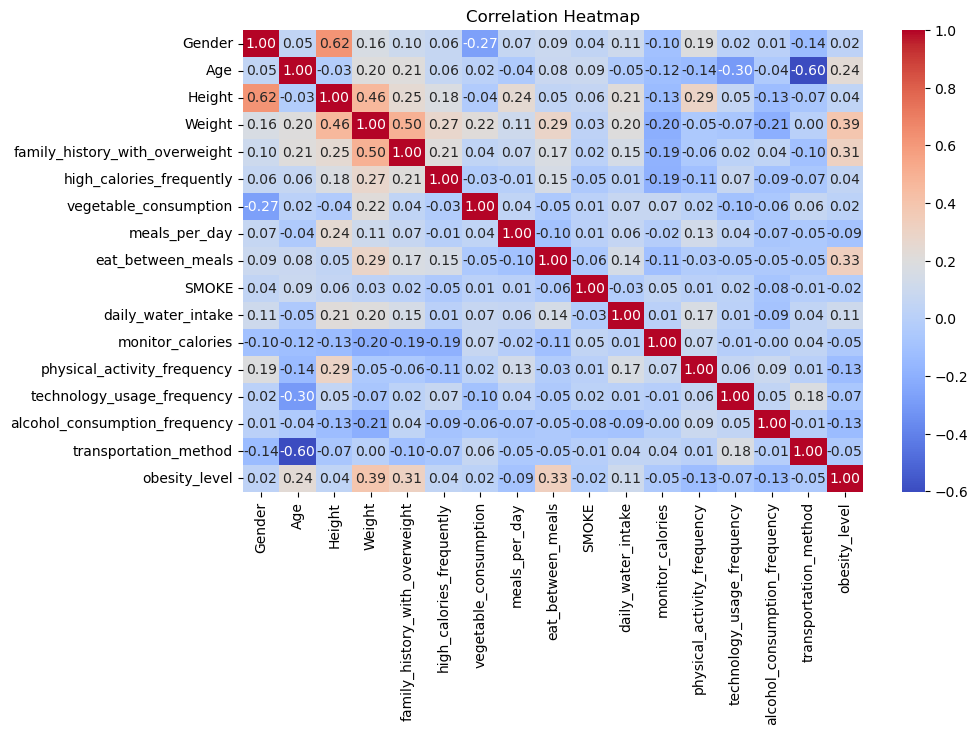

In [13]:
# Correlation heatmap to see relationships between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

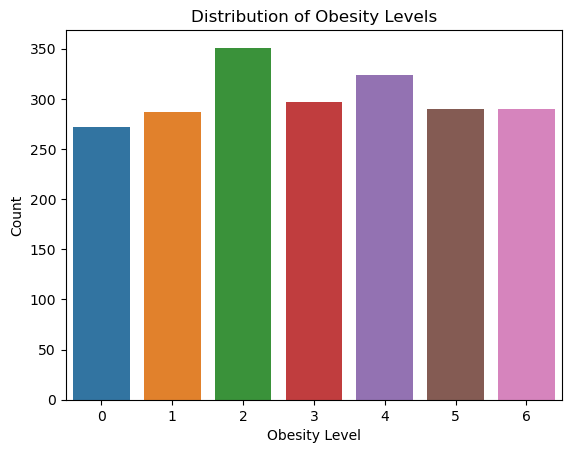

In [14]:
sns.countplot(x='obesity_level', data=df)
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()

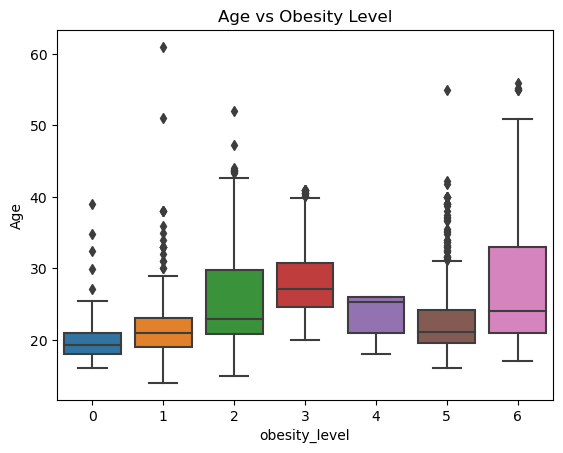

In [15]:
sns.boxplot(x='obesity_level', y='Age', data=df)
plt.title('Age vs Obesity Level')
plt.show()

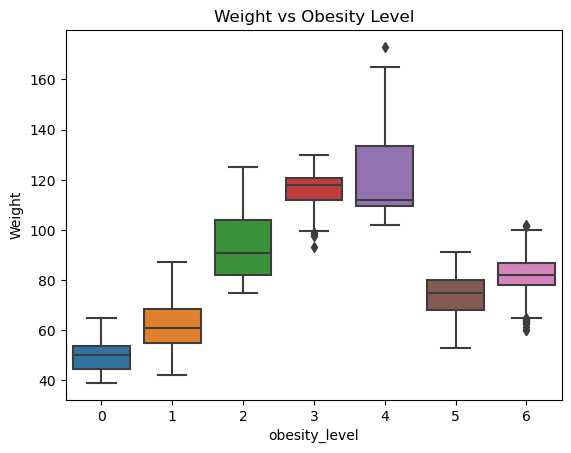

In [16]:
sns.boxplot(x='obesity_level', y='Weight', data=df)
plt.title('Weight vs Obesity Level')
plt.show()

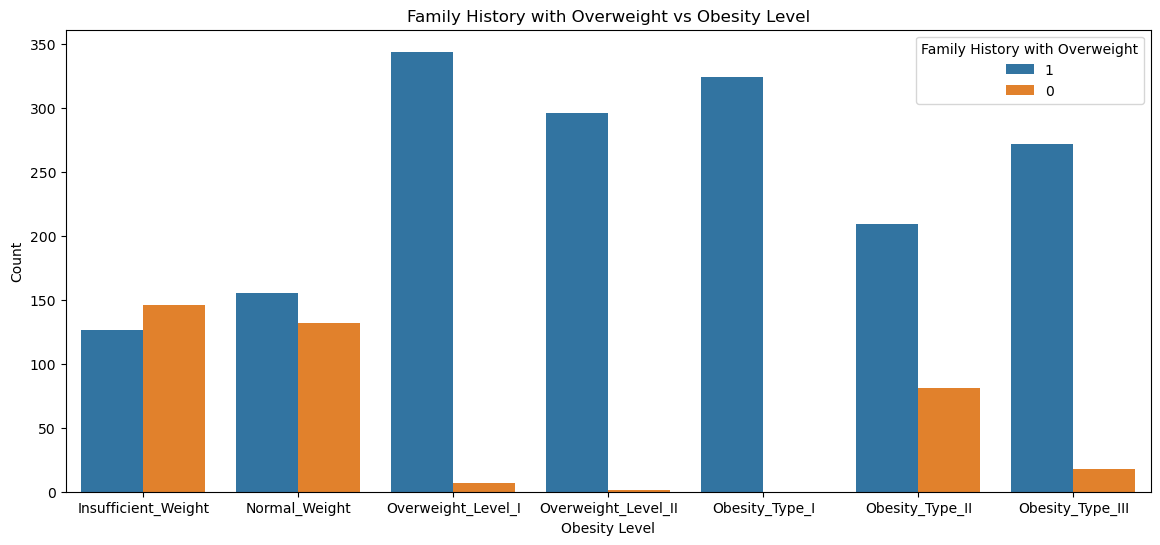

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'family_history_with_overweight' is of type string
df['family_history_with_overweight'] = df['family_history_with_overweight'].astype(str)

# Create the count plot
plt.figure(figsize=(14, 6))
sns.countplot(x='obesity_level', hue='family_history_with_overweight', data=df)
plt.title('Family History with Overweight vs Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Count')

# Correct xticks labels
plt.xticks(ticks=range(7), labels=[
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 
    'Obesity_Type_III'])

# Ensure legend labels dynamically reflect the data
plt.legend(title='Family History with Overweight', labels=df['family_history_with_overweight'].unique())

# Show the plot
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['obesity_level'])
y = df['obesity_level']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# using random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        86
           1       0.83      0.91      0.87        93
           2       0.98      0.96      0.97       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.89      0.85      0.87        88
           6       0.96      0.94      0.95        79

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.95      0.94      0.94       634


Accuracy Score:
0.943217665615142


                        Feature  Importance
3                        Weight    0.341948
2                        Height    0.102880
6         vegetable_consumption    0.095253
1                           Age    0.094507
0                        Gender    0.054725
7                 meals_per_day    0.050081
12  physical_activity_frequency    0.044104
13   technology_usage_frequency    0.043939
10           daily_water_intake    0.042592
8             eat_between_meals    0.033350


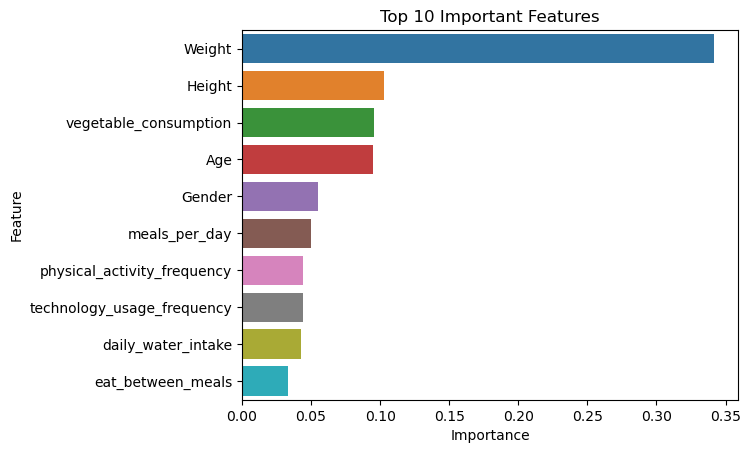

In [19]:
feature_importances = model.feature_importances_
features = X.columns

# see which variables are most important
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(10))

sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

In [39]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model 
glm_model = LogisticRegression(max_iter=9000, random_state=42, solver='saga')
glm_model.fit(X_train, y_train)

# Make predictions
glm_y_pred = glm_model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression (GLM) - Classification Report:")
print(classification_report(y_test, glm_y_pred))
print(f"Logistic Regression (GLM) - Accuracy Score: {accuracy_score(y_test, glm_y_pred)}")


Logistic Regression (GLM) - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        86
           1       0.86      0.59      0.70        93
           2       0.94      0.90      0.92       102
           3       0.91      0.98      0.94        88
           4       1.00      0.99      0.99        98
           5       0.74      0.73      0.73        88
           6       0.74      0.82      0.78        79

    accuracy                           0.86       634
   macro avg       0.86      0.86      0.85       634
weighted avg       0.86      0.86      0.85       634

Logistic Regression (GLM) - Accuracy Score: 0.8580441640378549
